<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_23_Spring_2021(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification Algorithms

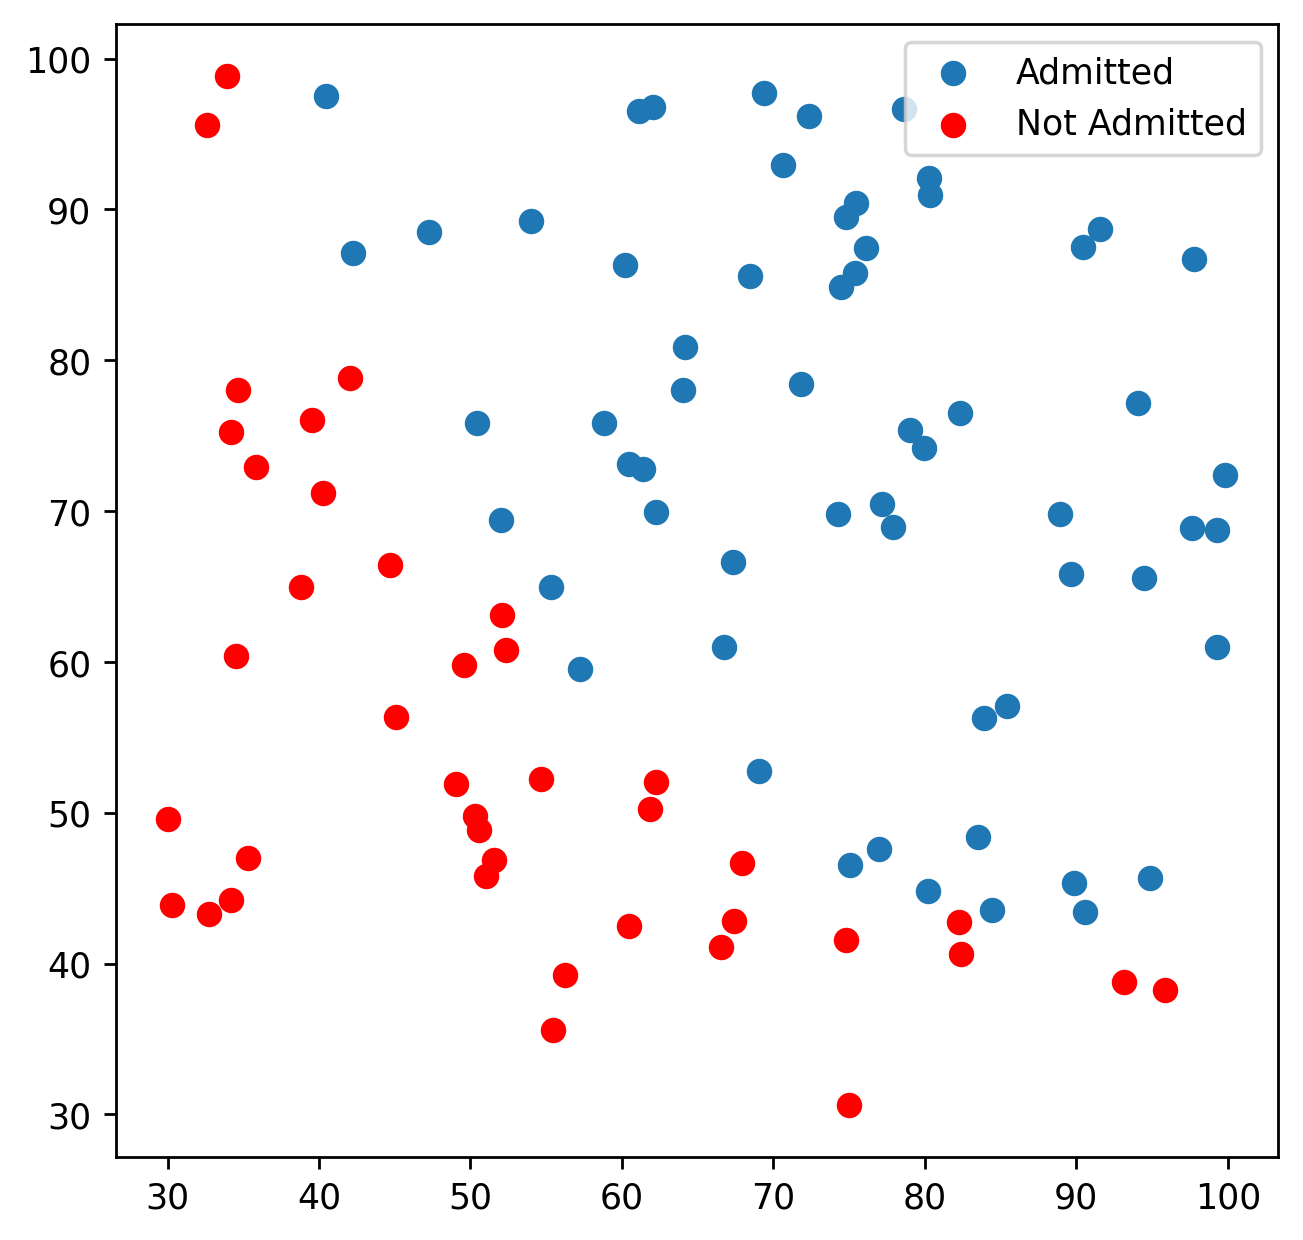

In [ ]:
# imports
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as CM
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 125


# load the data from the file
data = pd.read_csv("drive/MyDrive/Data Sets/example_data_classification.csv", header=None)

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

# filter out the applicants that got admitted
admitted = data.loc[y == 1]

# filter out the applicants that din't get admission
not_admitted = data.loc[y == 0]

# plots
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=40, label='Admitted')
ax.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=40,c='red', label='Not Admitted')
plt.legend()
plt.show()

In [ ]:
df = pd.DataFrame(data=data.values,columns=['Exam 1','Exam 2','Status'])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df

,Exam 1,Exam 2,Status
0,34.623660,78.024693,0.0
1,30.286711,43.894998,0.0
2,35.847409,72.902198,0.0
3,60.182599,86.308552,1.0
4,79.032736,75.344376,1.0
...,...,...,...
95,83.489163,48.380286,1.0
96,42.261701,87.103851,1.0
97,99.315009,68.775409,1.0
98,55.340018,64.931938,1.0


In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
print(model.coef_)
print(model.intercept_)
print(accuracy)

[[0.20535491 0.2005838 ]]
[-25.05219314]
0.89


## Confusion Matrix

In [ ]:
spc = ['Not Admitted','Admitted']
cm = CM(y,predicted_classes)
pd.DataFrame(cm, columns=spc, index=spc)

,Not Admitted,Admitted
Not Admitted,34,6
Admitted,5,55


## Visualization of the Classification Model

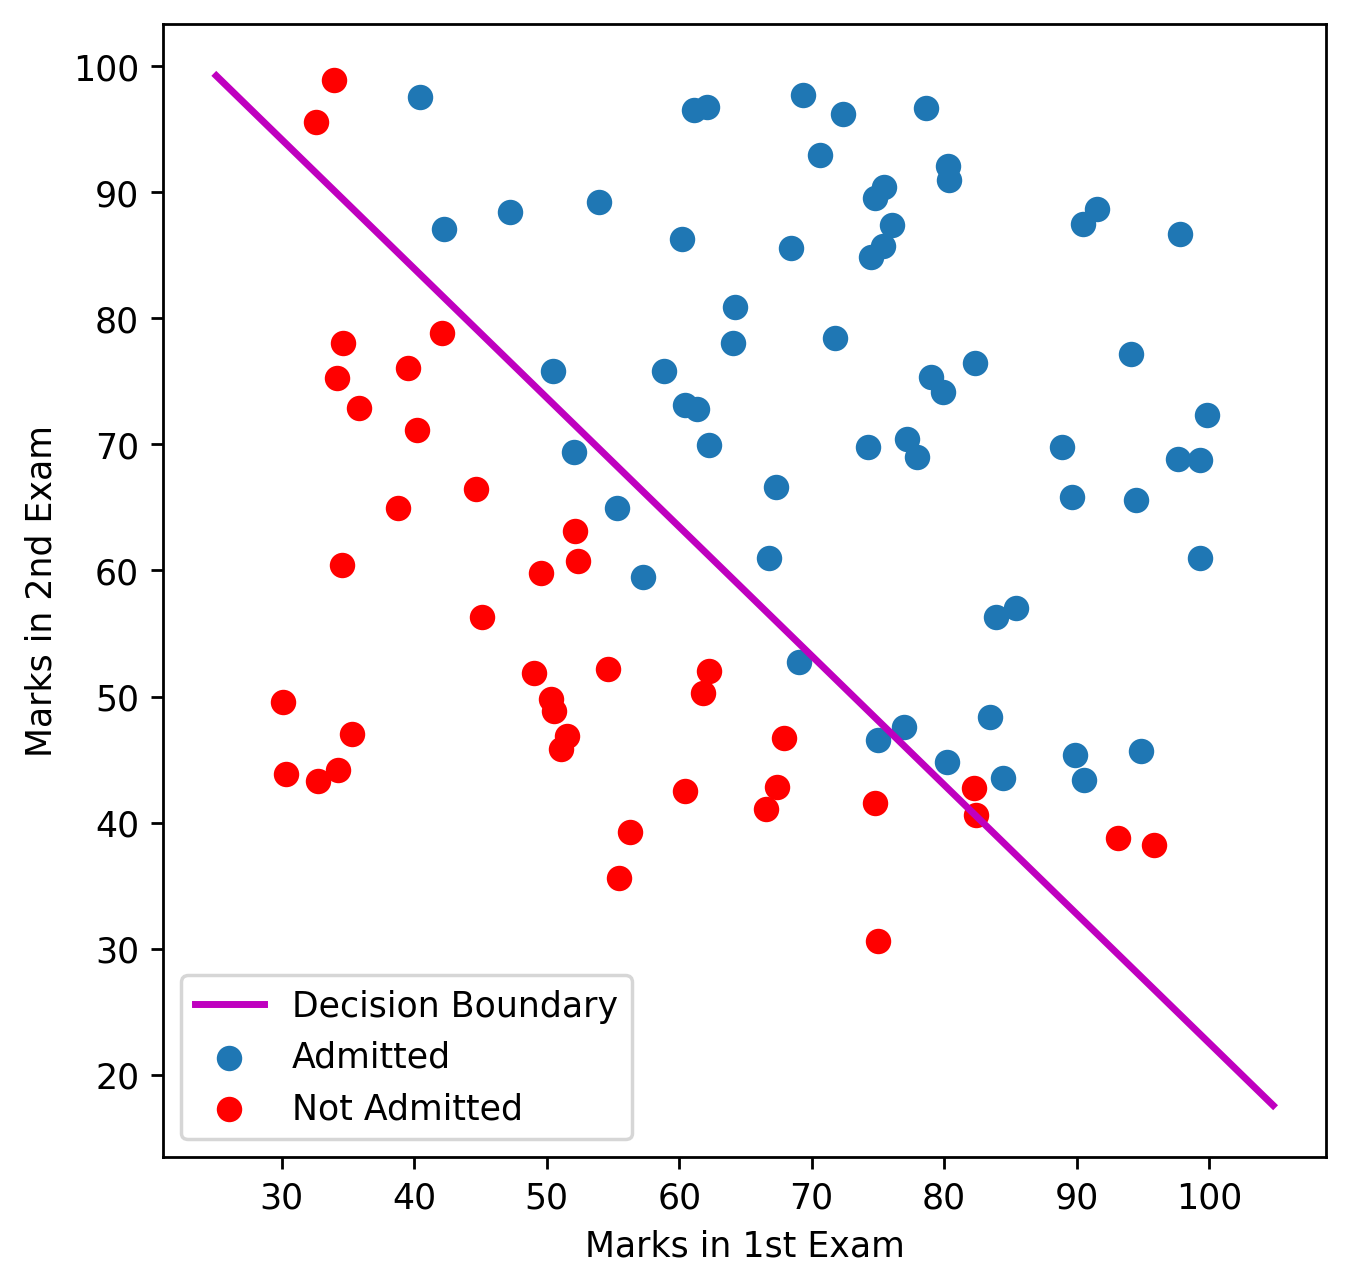

In [ ]:
x_values = [np.min(X.values[:, 0] - 5), np.max(X.values[:, 0] + 5)]
y_values = - (model.intercept_ + model.coef_[:,0]*x_values) / model.coef_[:,1]

fig, ax = plt.subplots(figsize=(6,6))
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=40, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=40,c='red', label='Not Admitted')
plt.plot(x_values, y_values, label='Decision Boundary',color='m',lw=2)
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

# KNN

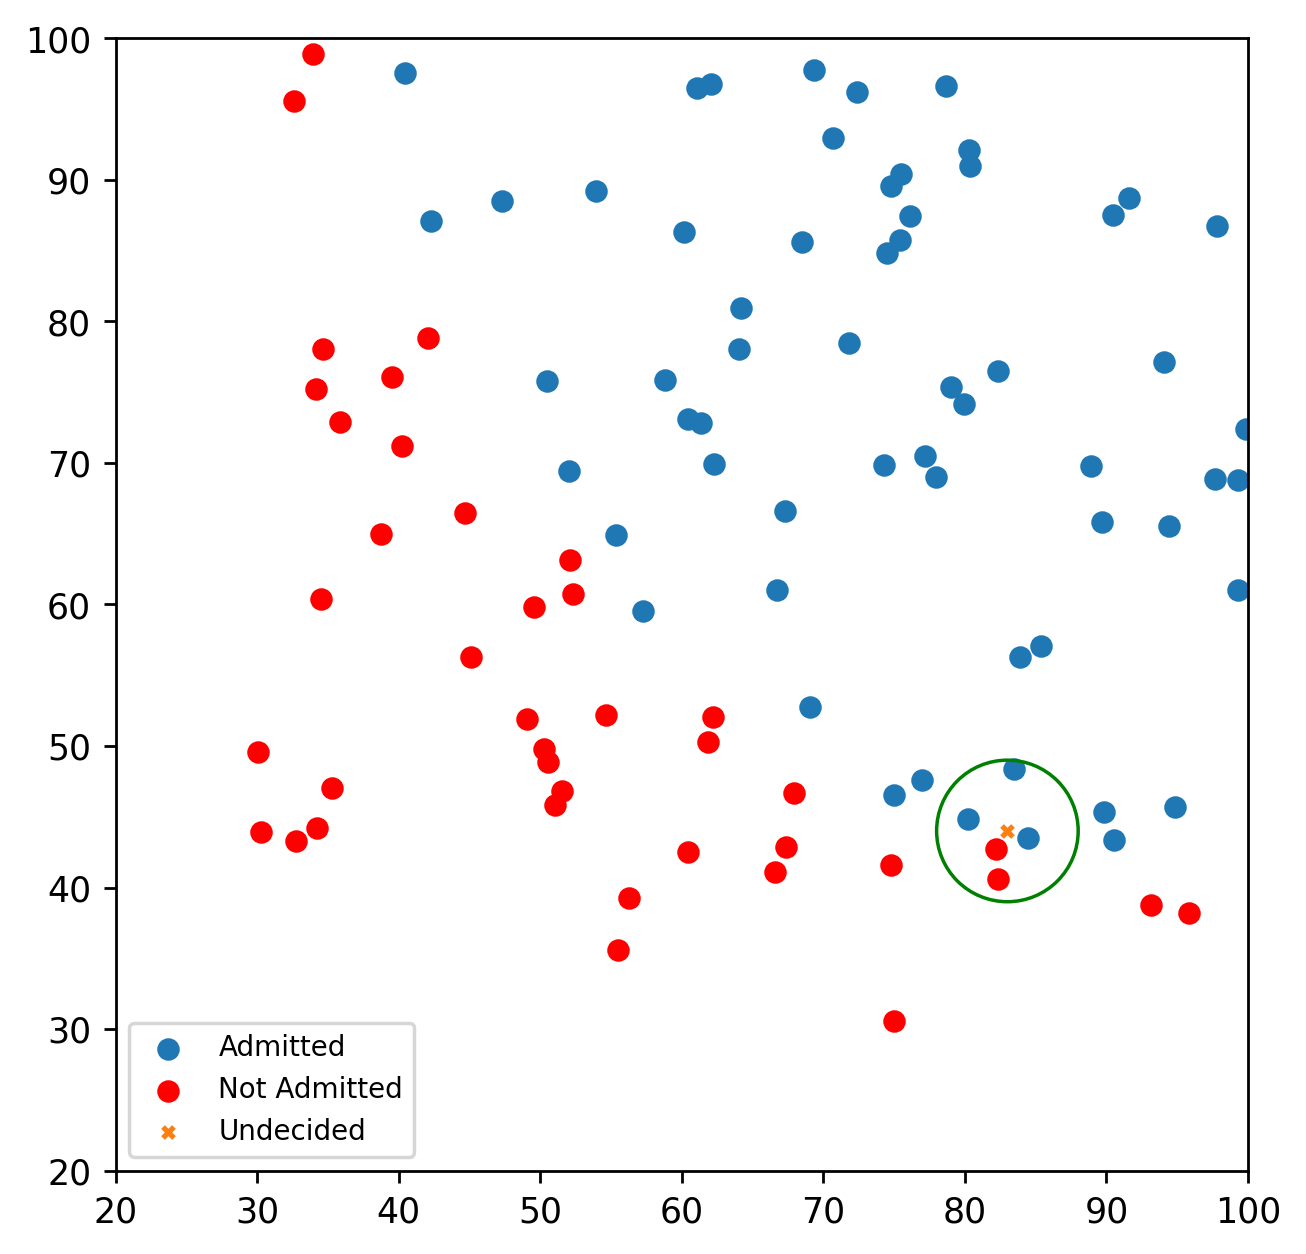

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 125

fig, ax = plt.subplots(figsize=(6,6))

circle = plt.Circle((83, 44), 5, color='g', fill=False)

ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((20, 100))
ax.set_ylim((20, 100))
# some data
ax.plot(range(11), 'o', color='black')
# key data point that we are encircling
ax.plot((5), (5), 'o', color='y')
ax.add_artist(circle)

ax.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=30, label='Admitted')
ax.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=30,c='red', label='Not Admitted')
ax.scatter(83,44, s=10,marker='x',label='Undecided')
ax.set_aspect('equal', 'box')
plt.legend(fontsize=8)
fig.savefig('plotcircles2.png')

In [ ]:
n_neighbors = 5
h = .1  # step size in the mesh
cmap_light = ListedColormap(['bisque', 'lightcyan'])
cmap_bold = ListedColormap(['#AC1C0D', '#00FF00'])

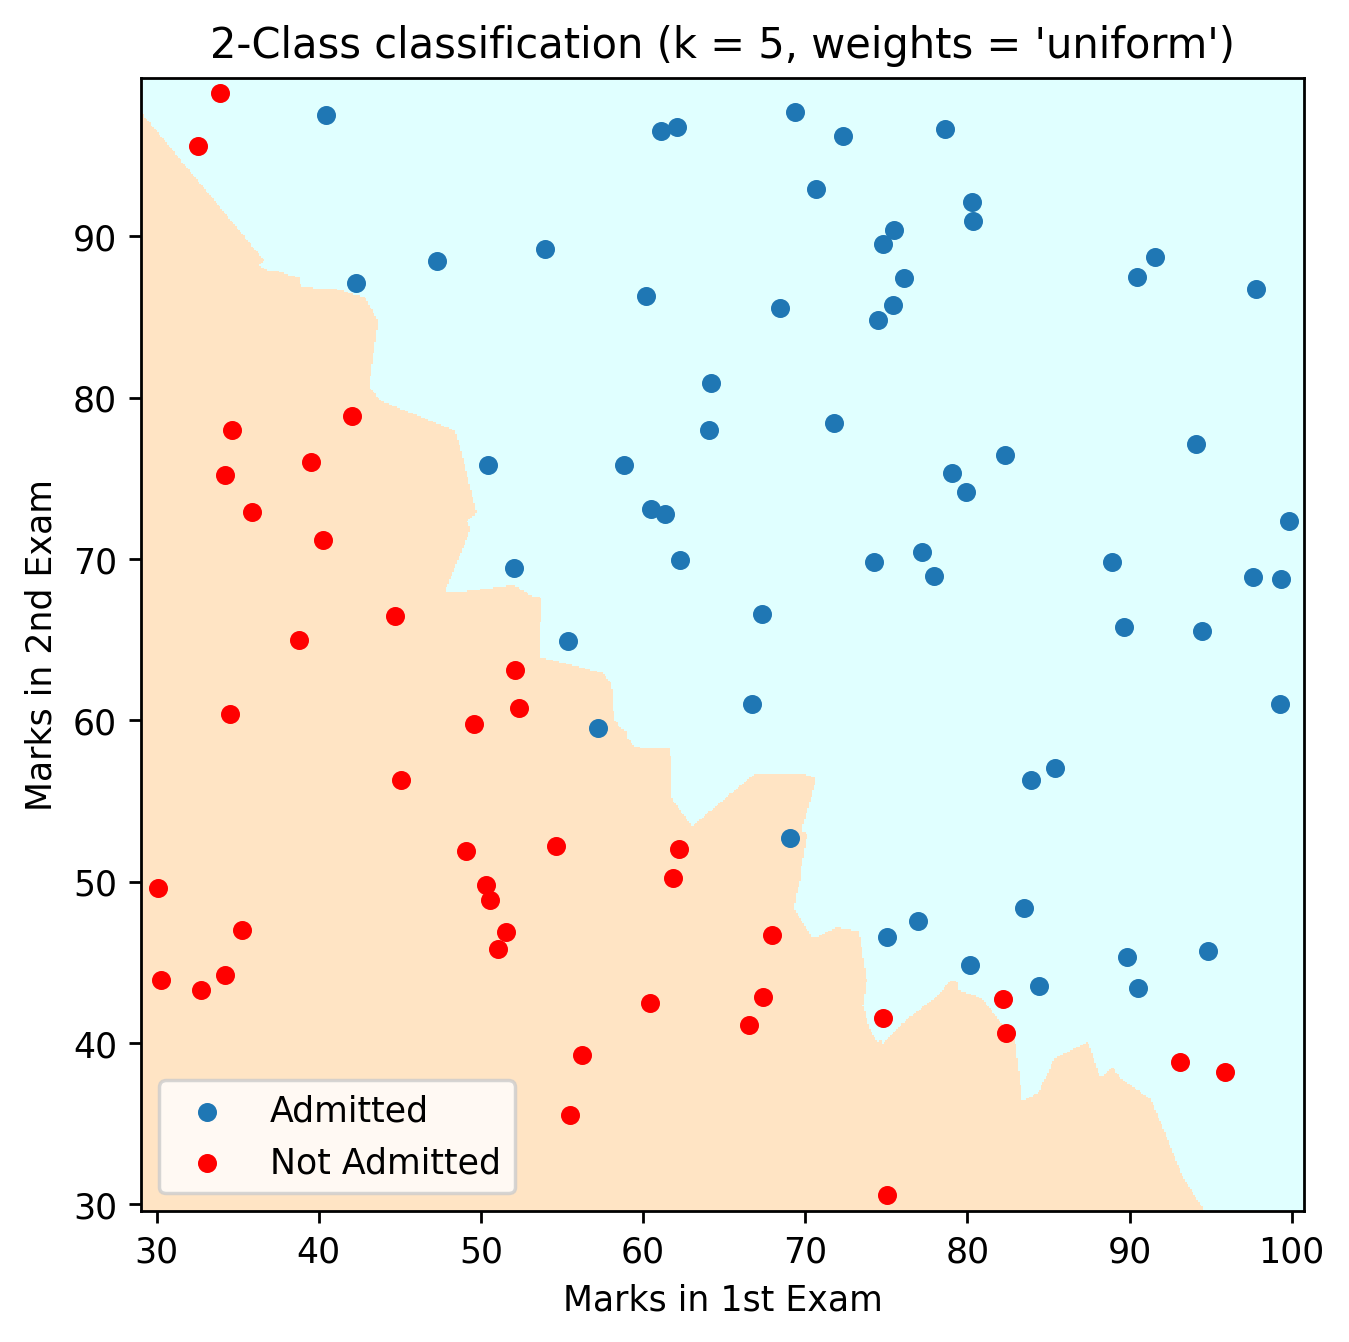

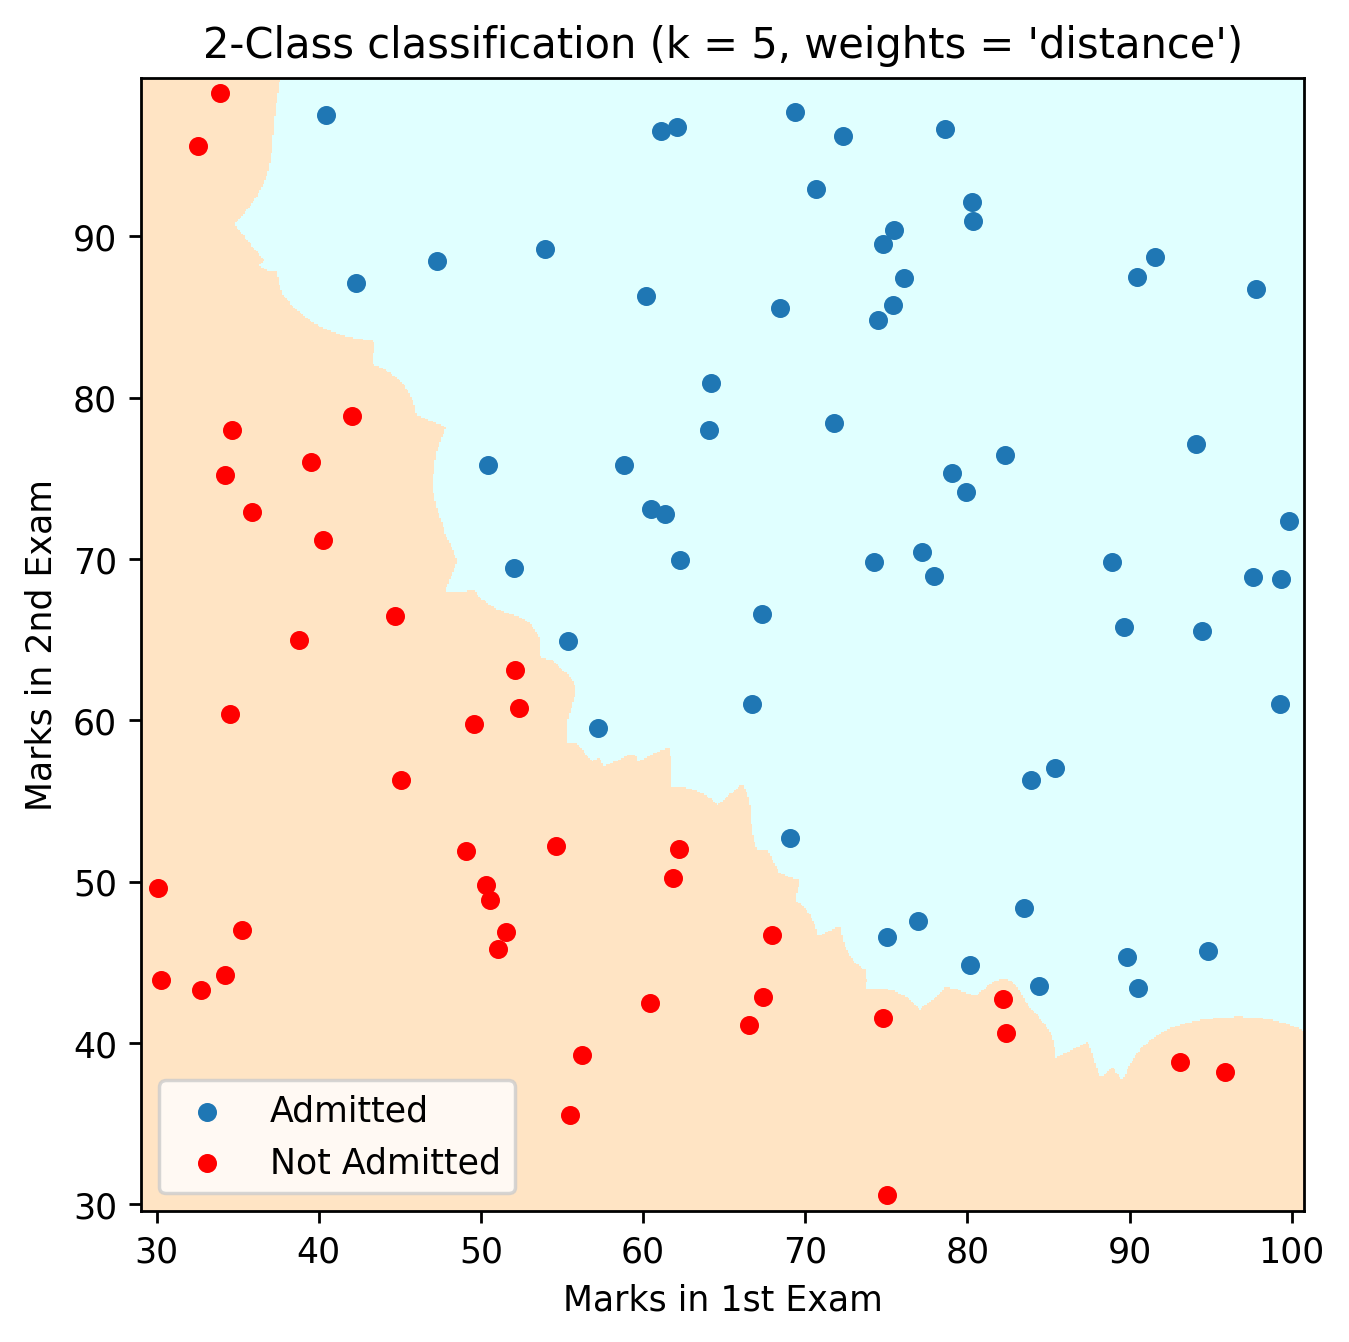

In [ ]:
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
    y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots(figsize=(6,6))
    ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the points
    
    ax.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=20, label='Admitted')
    ax.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=20,c='red', label='Not Admitted')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel('Marks in 1st Exam')
    plt.ylabel('Marks in 2nd Exam')
    plt.legend()
    plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Support Vector Machine Classification

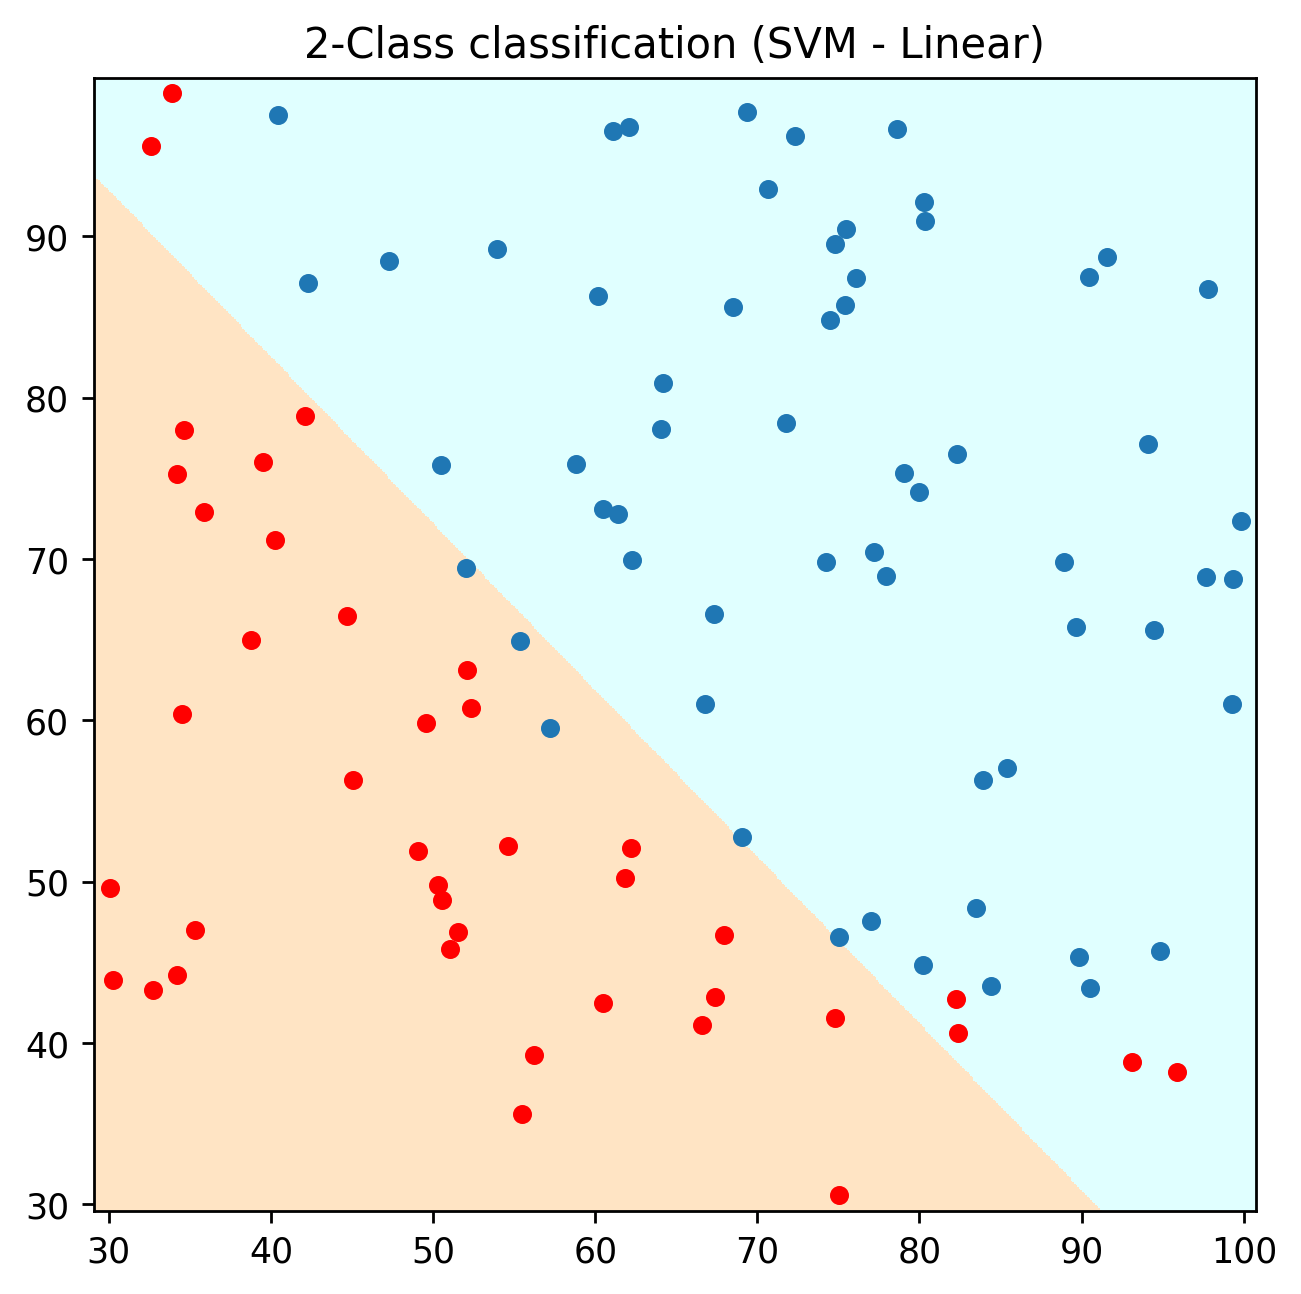

In [ ]:
svc = SVC(kernel='linear', C=1,gamma='auto').fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
ax.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=20, label='Admitted')
ax.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=20,c='red', label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (SVM - Linear)")

plt.show()

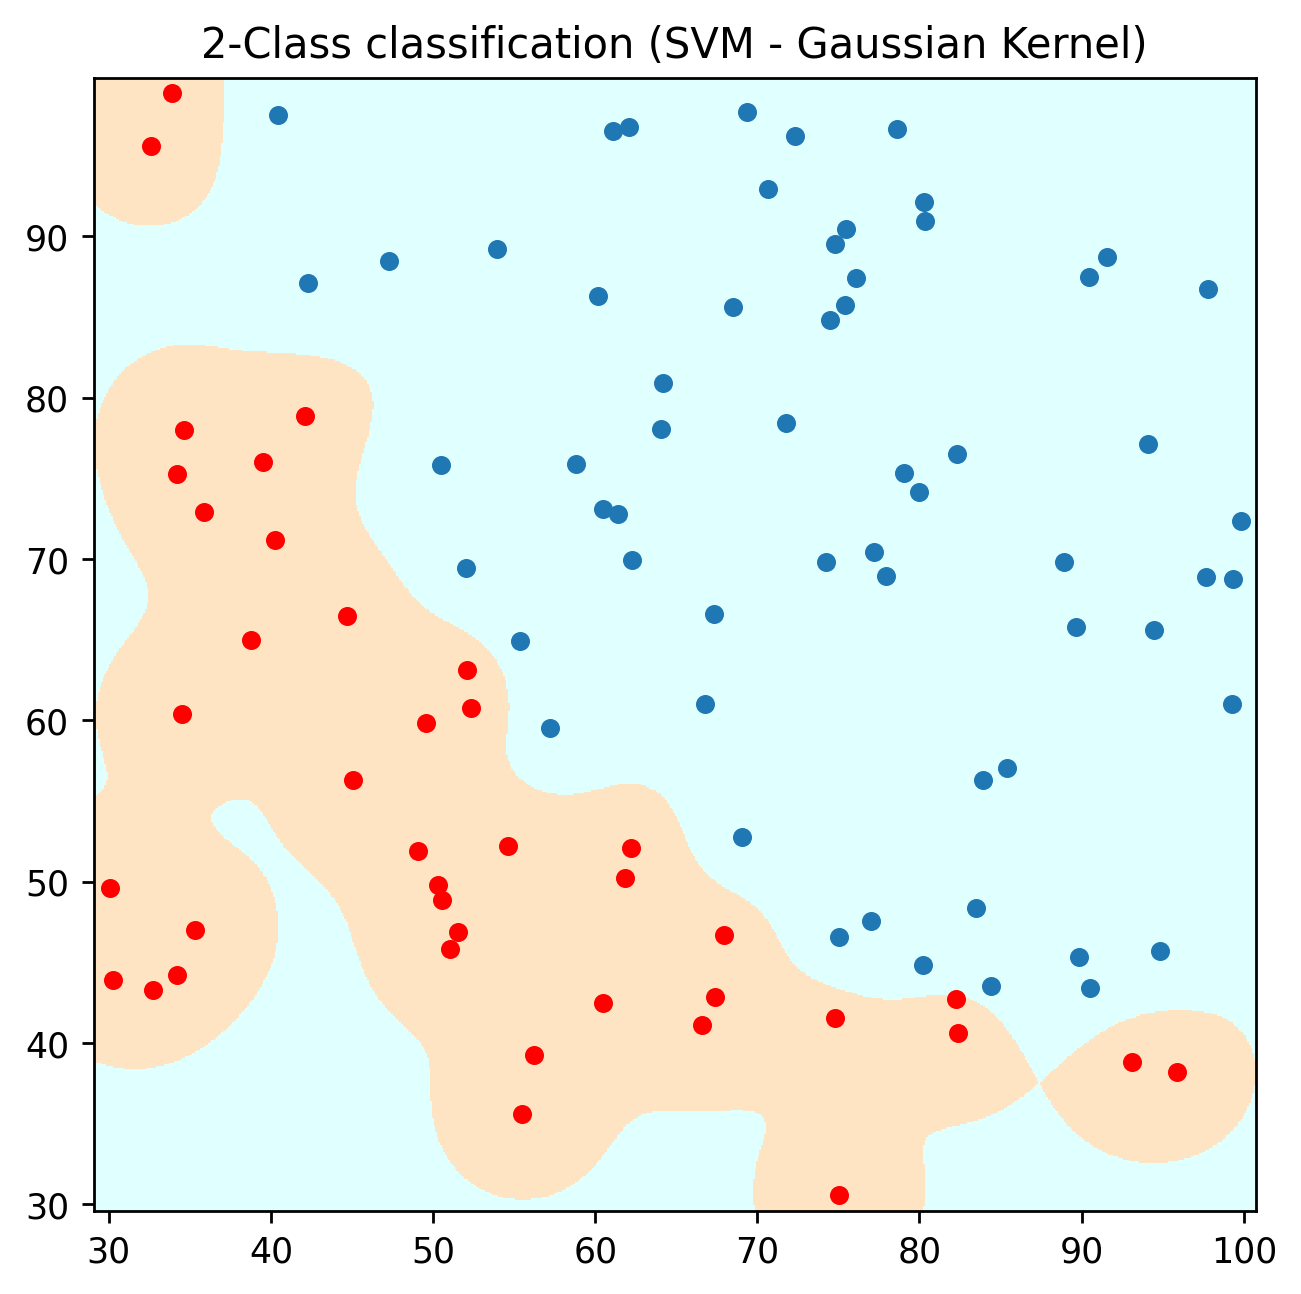

In [ ]:
h = 0.1
x_min, x_max = X.values[:, 0].min() - 1, X.values[:, 0].max() + 1
y_min, y_max = X.values[:, 1].min() - 1, X.values[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
svc = svm.SVC(kernel='rbf', C=1,gamma=0.05).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
ax.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=20, label='Admitted')
ax.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=20,c='red', label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (SVM - Gaussian Kernel)")

plt.show()

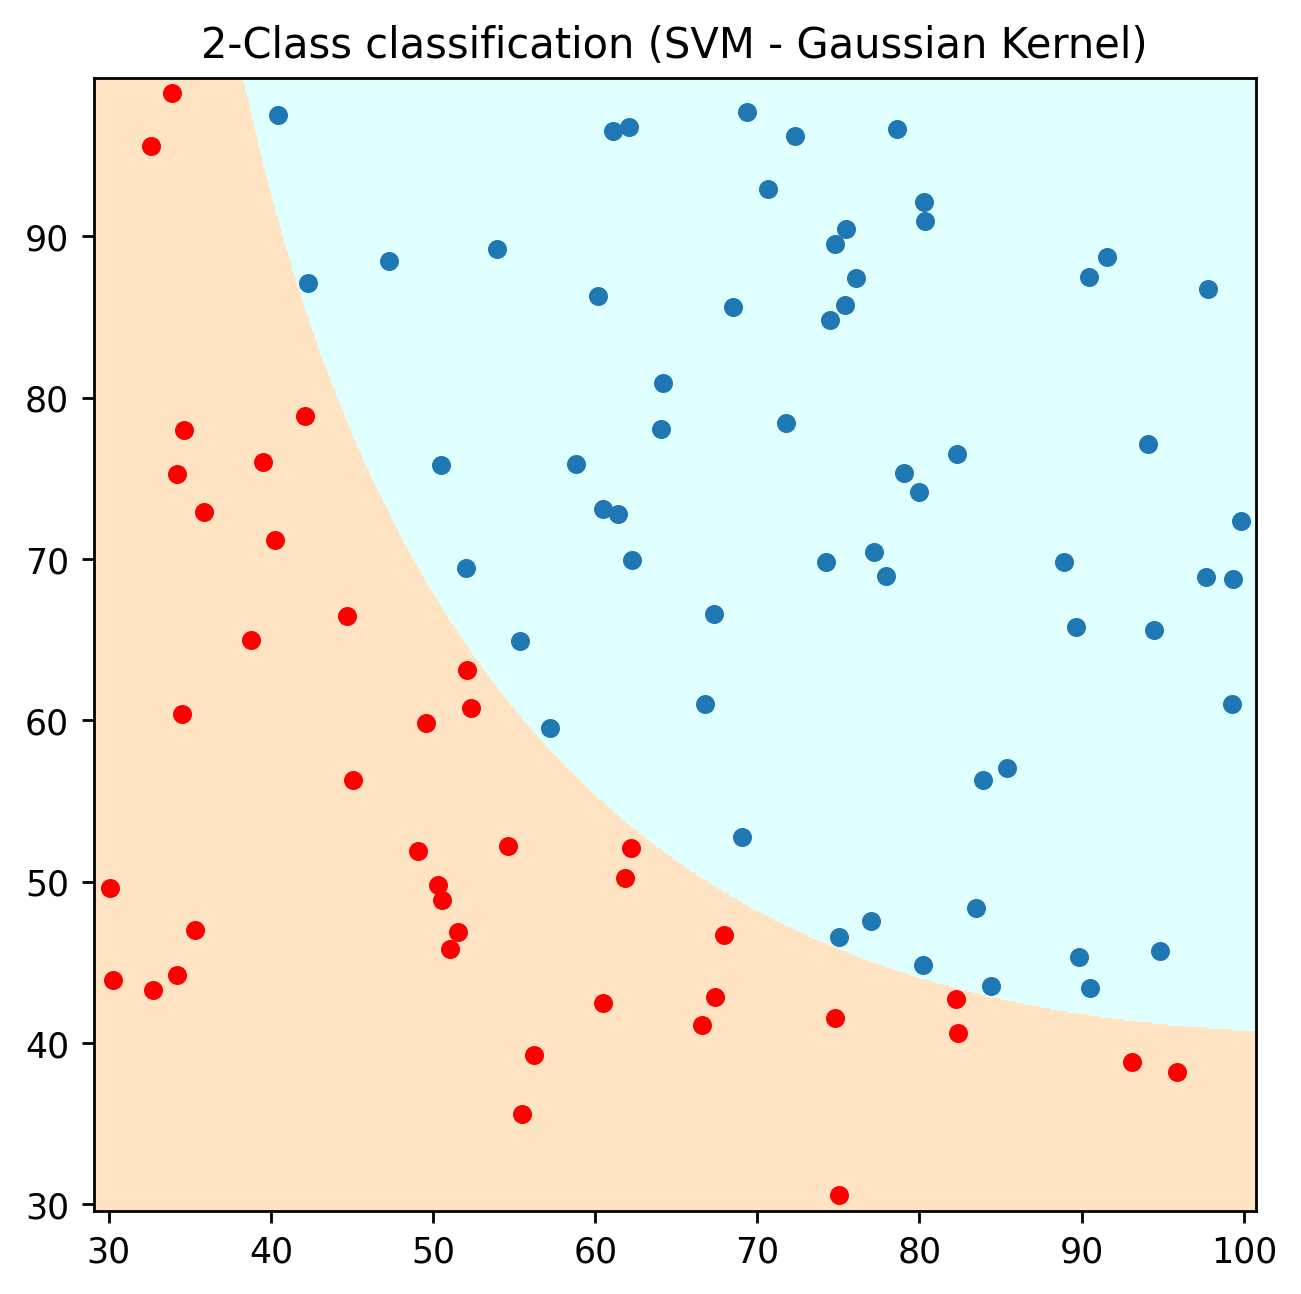

In [ ]:
svc = svm.SVC(kernel='poly',degree=3,gamma='auto',C = 1).fit(X, y)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
ax.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=20, label='Admitted')
ax.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=20,c='red', label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (SVM - Gaussian Kernel)")

plt.show()

# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
print(accuracy)

0.93


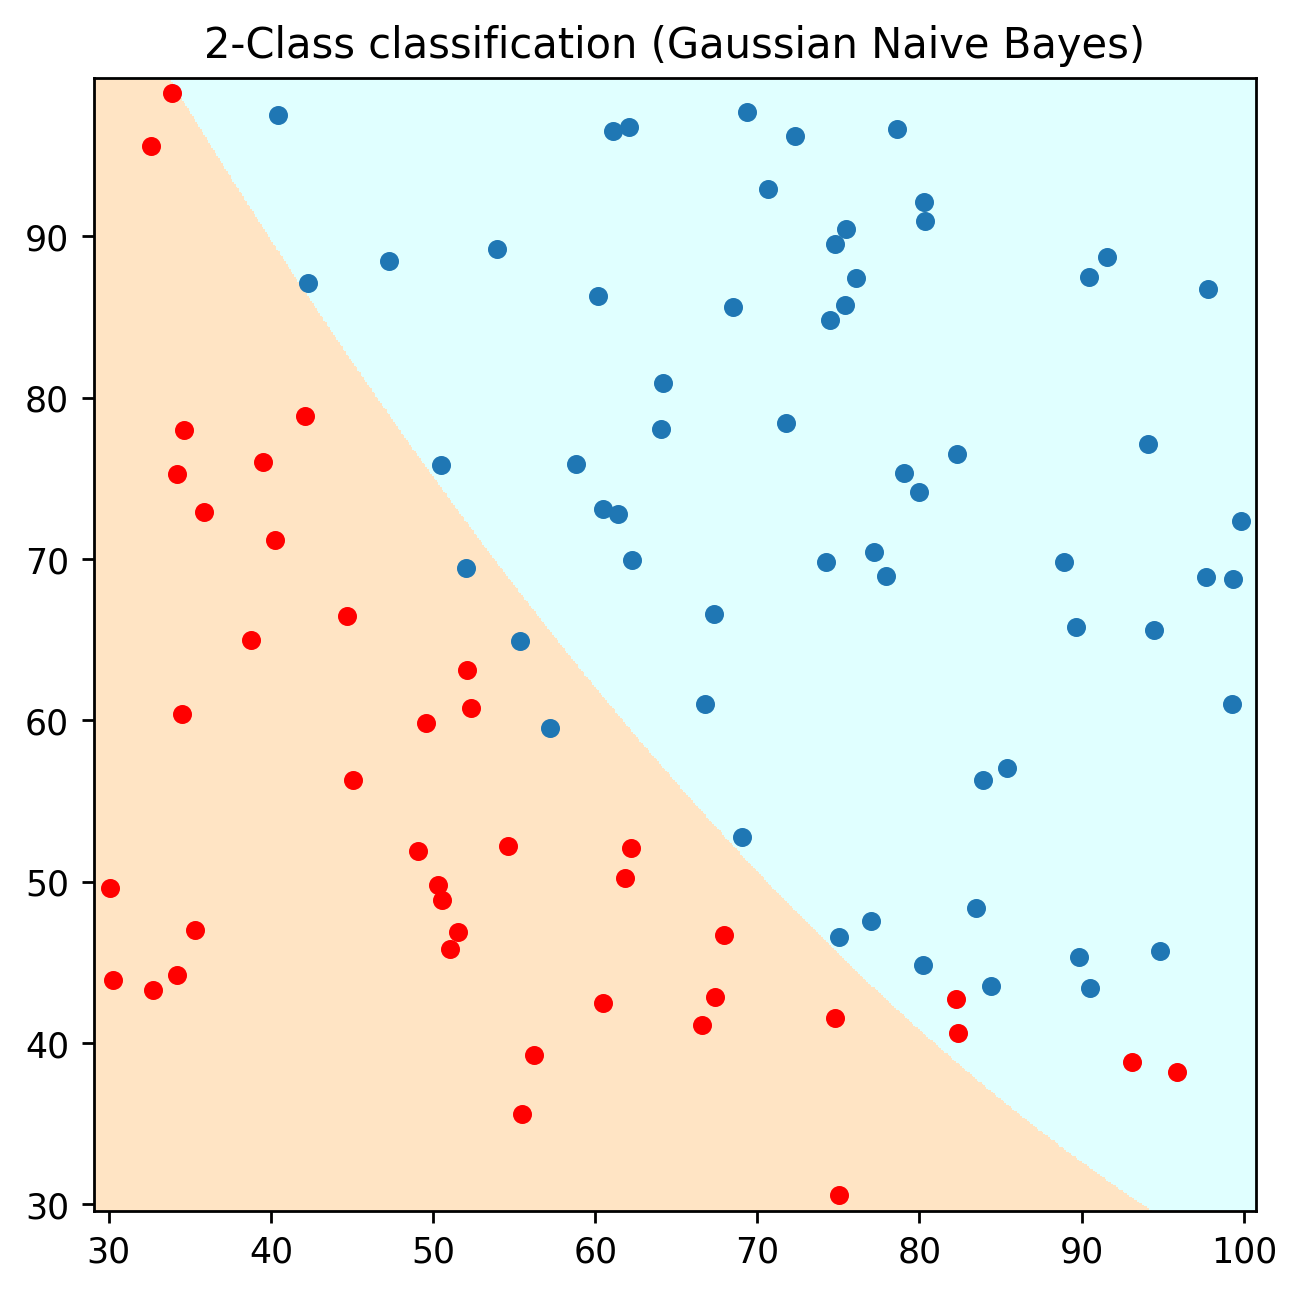

In [ ]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=20, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=20,c='red', label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (Gaussian Naive Bayes)")

plt.show()

# Decision Tree classifier

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=123, max_depth=4)
model.fit(X, y);
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
print(accuracy)

1.0


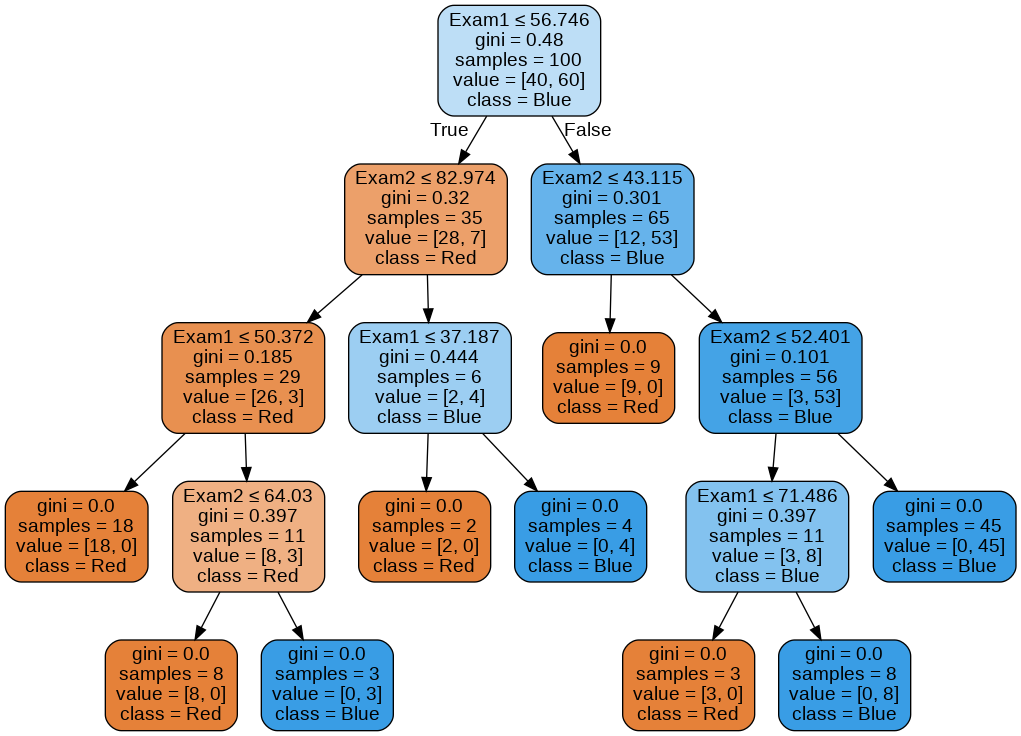

In [ ]:
import pydot
from IPython.display import Image


feats = ['Exam1','Exam2']
spc = ['Red','Blue']
def ShowTree(classifier, features, classes):
    dot_data = tree.export_graphviz(model, out_file=None, filled=True, rounded=True,
                special_characters=True, feature_names=features, class_names=classes)
    (g,) = pydot.graph_from_dot_data(dot_data)
    return Image(g.create_png())

ShowTree(model, feats, spc)

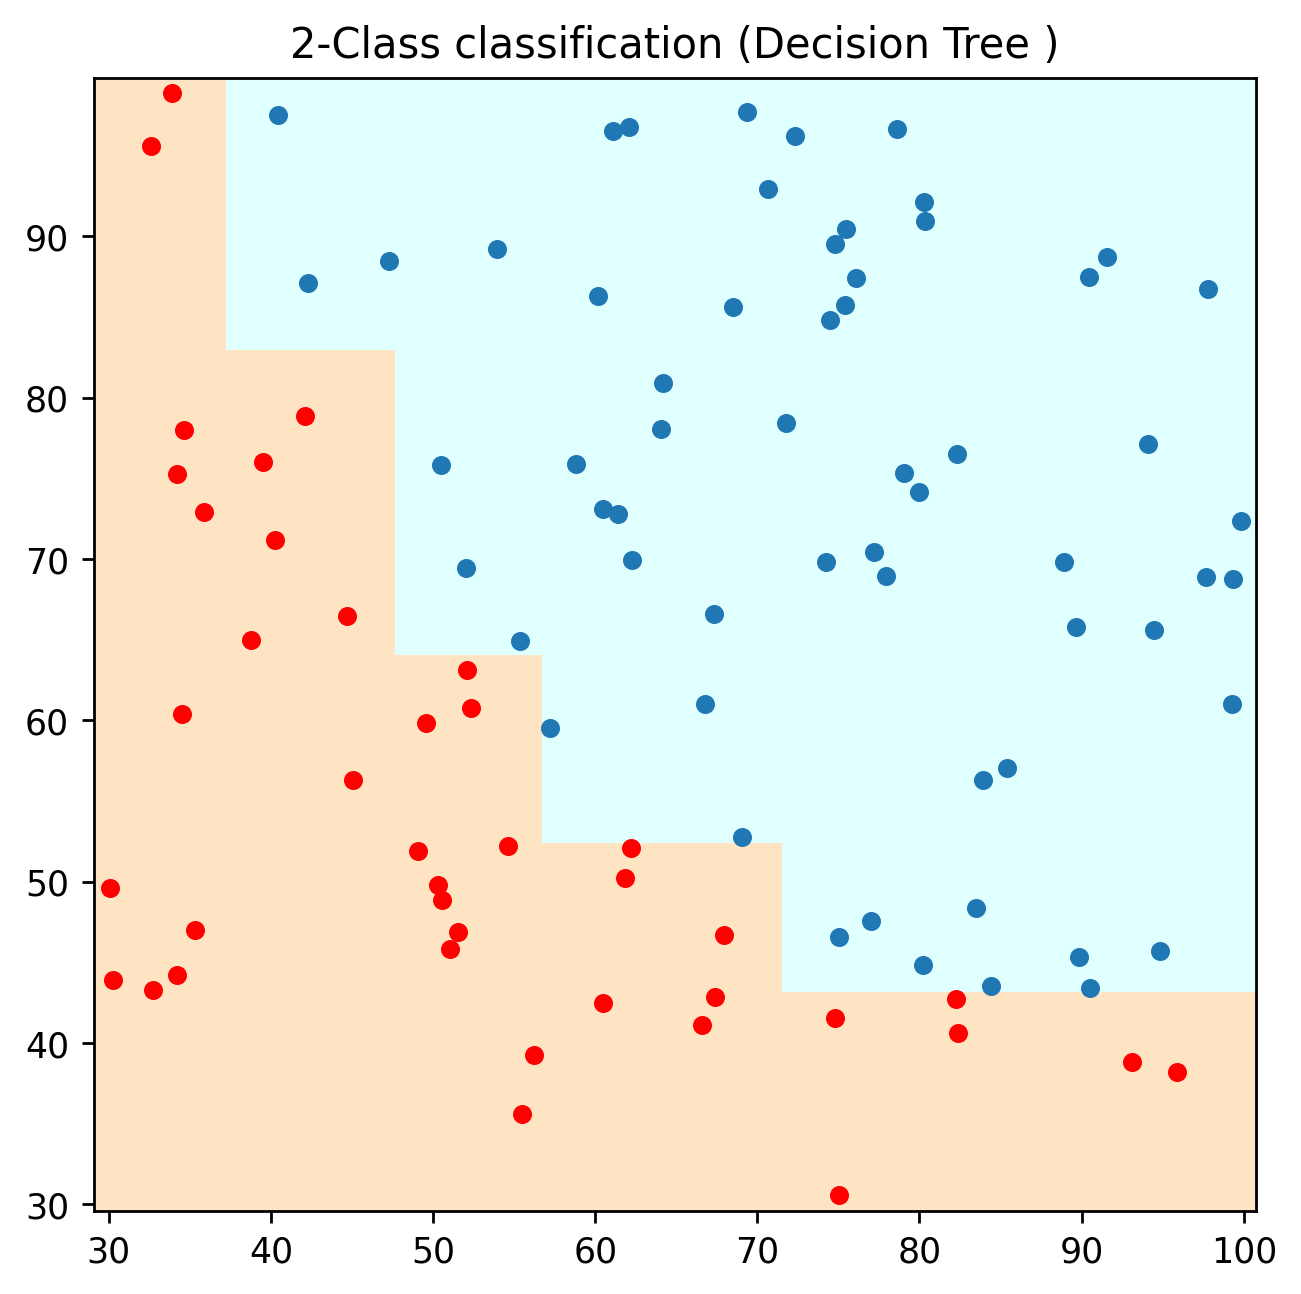

In [ ]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=20, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=20,c='red', label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (Decision Tree )")

plt.show()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1234, max_depth=5, n_estimators = 1000)
model.fit(X, y);
predicted_classes = model.predict(X)
accuracy = accuracy_score(y,predicted_classes)
print(accuracy)

1.0


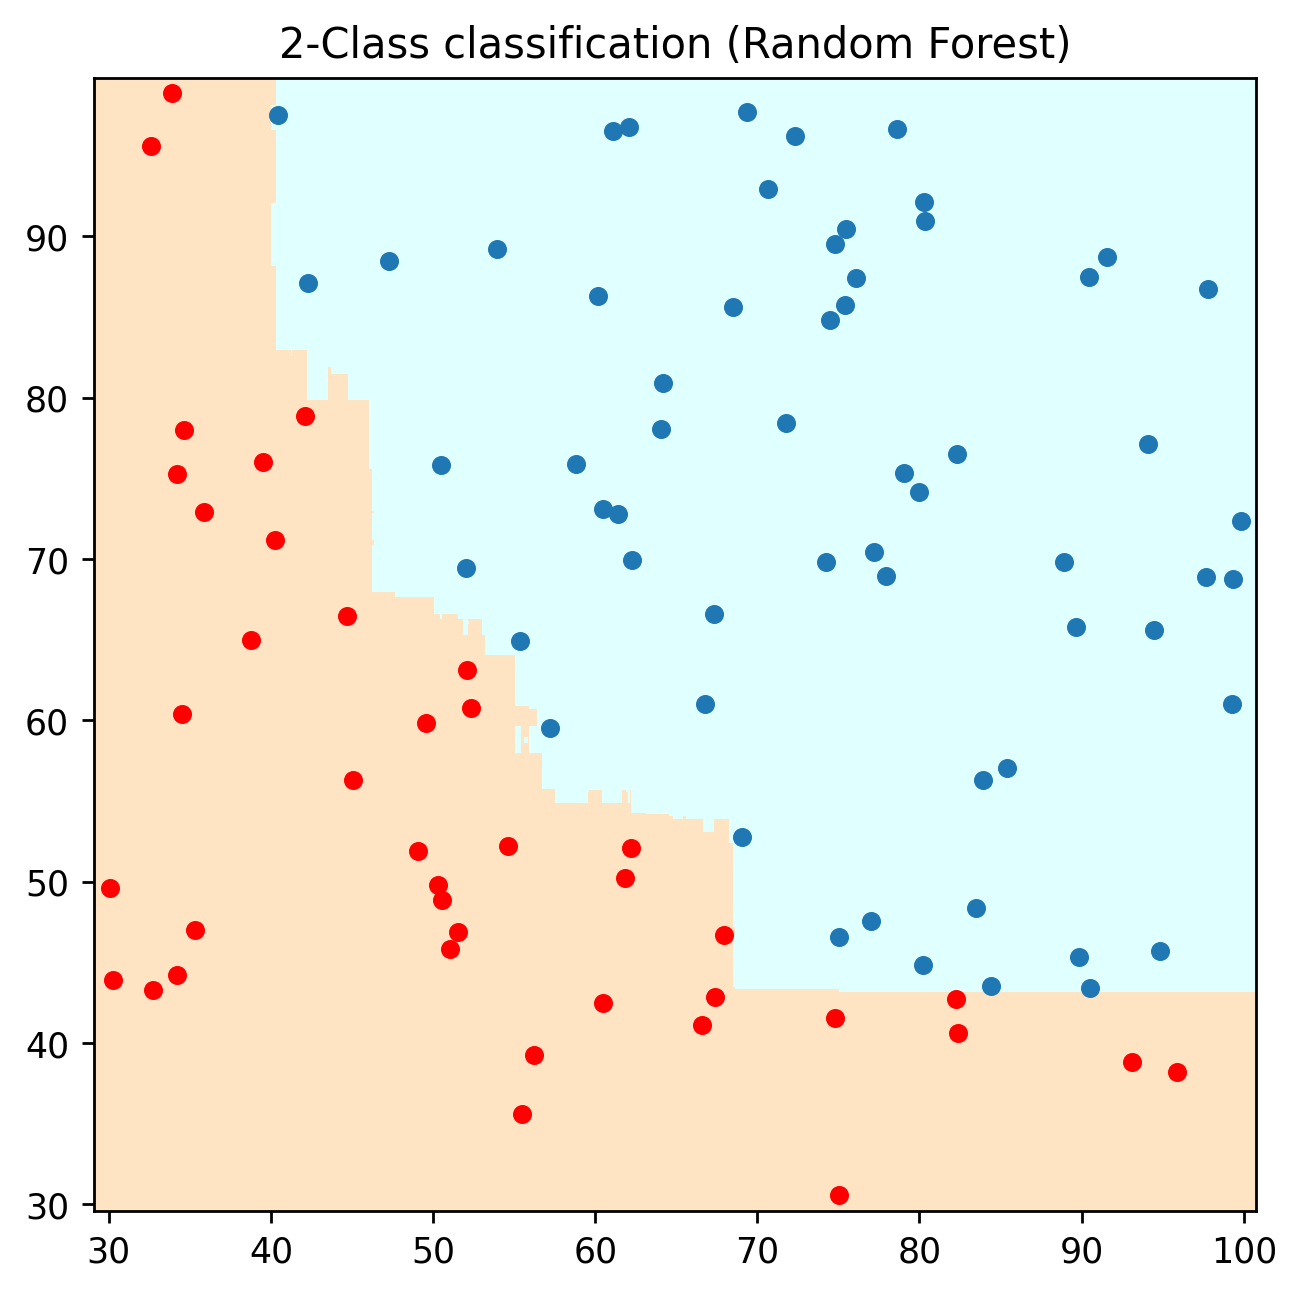

In [ ]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax = plt.subplots(figsize=(6,6))
ax.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the points
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=20, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=20,c='red', label='Not Admitted')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (Random Forest)")

plt.show()